# Yuri Santana Lopes - 222009750

## Iniciando o Ambiente
Realizando a importação das bibliotecas para o ambiente de desenvolvimento

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow
from matplotlib import *
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Verificar se o Tensorflow está funcionando corretamente

In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
file_id = "1l_nmWytogN_4SR_jhWapdHRKc_uYpWb6"
url = f"https://drive.google.com/file/d/{file_id}/view"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

star = pd.read_csv(download_url)

Método .head(), assim verificando se o arquivo foi importado corretamente

In [4]:
star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Pré processamento dos dados

In [5]:
star.isnull().sum()


,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


### Em seguida, realizei a separação entre os valores de x e y

In [6]:
x = star.drop('class', axis=1)
y = star['class']

### Depois Normalizar os dados para os pesos não interferirem nos valores finais

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

### Codificando os rótulos
assim é possível atribuir um codificamento para cada um dos resultados que queremos obter

In [8]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # transforma Galáxia, Estrela, Quasar em 0, 1, 2
y_categorical = to_categorical(y_encoded, num_classes=3)  # one-hot: [1,0,0] etc.

### 6. Separar em treino (70%), validação (15%) e teste (15%)

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Verifiando se a separação dos valores ocorreu bem

In [10]:
print("Formato dos dados:")
print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)

Formato dos dados:
Treino: (70000, 17)
Validação: (15000, 17)
Teste: (15000, 17)


## Desafios Obrigatórios

### Verificação final da formatação dos dados

### a.  Criar  uma  rede  neural  de classificação entre galáxias, quasares e estrelas

In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: estrela, galáxia, quasar
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 2. Compilar o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# 3. Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8389 - loss: 0.4133 - val_accuracy: 0.9455 - val_loss: 0.1596
Epoch 2/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9526 - loss: 0.1503 - val_accuracy: 0.9564 - val_loss: 0.1348
Epoch 3/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9594 - loss: 0.1338 - val_accuracy: 0.9614 - val_loss: 0.1228
Epoch 4/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9641 - loss: 0.1192 - val_accuracy: 0.9623 - val_loss: 0.1201
Epoch 5/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9627 - loss: 0.1199 - val_accuracy: 0.9627 - val_loss: 0.1193
Epoch 6/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9644 - loss: 0.1169 - val_accuracy: 0.9645 - val_loss: 0.1165
Epoch 7/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9653 - loss: 0.1121 - val_accuracy: 0.9645 - val_loss: 0.1126
Epoch 8/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.1088 

In [14]:
# 4. Avaliar no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.2155
Acurácia no conjunto de teste: 0.9700


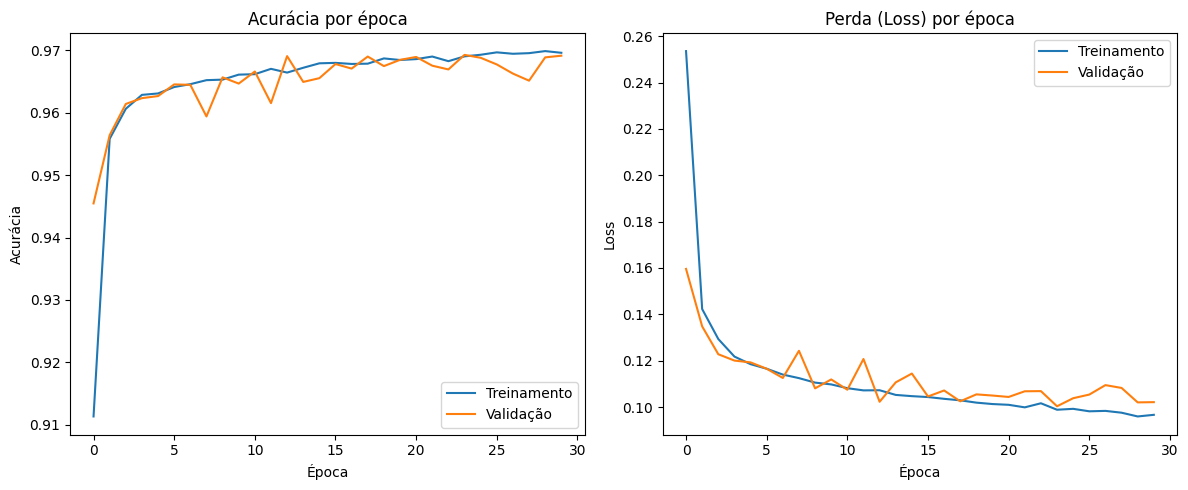

In [15]:
# Plotar a acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Plotar a perda (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

- Acurácia
A acurácia de treinamento está estável e alta (acima de 97%).

A acurácia de validação também está próxima (entre 96.5% e 97%), mas com algumas oscilações.

- Perda (Loss)
O loss de validação é mais instável do que o de treinamento.

O loss de treinamento segue caindo, mas o de validação oscila e até sobe um pouco em certos momentos.

Concluindo, isso indica um leve overfitting. O modelo está aprendendo muito bem os dados de treino, mas não está generalizando perfeitamente para os dados de validação.

Como o gap ainda não é enorme, está sob controle, mas ainda é possível melhorar.

### b.  Testar o efeito de se variar a largura e a profundidade da rede neural;

In [16]:
def build_model(model_type, input_dim):
    if model_type == 'A':
        return Sequential([
            Dense(16, activation='relu', input_shape=(input_dim,)),
            Dense(3, activation='softmax')
        ])

    elif model_type == 'B':
        return Sequential([
            Dense(64, activation='relu', input_shape=(input_dim,)),
            Dense(32, activation='relu'),
            Dense(3, activation='softmax')
        ])

    elif model_type == 'C':
        return Sequential([
            Dense(128, activation='relu', input_shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ])


In [17]:
from tensorflow.keras.optimizers import Adam

results = {}

for model_type in ['A', 'B', 'C']:
    model = build_model(model_type, X_train.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nTreinando Modelo {model_type}...\n")
    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0  # ou 1 se quiser ver o progresso
    )

    results[model_type] = history



Treinando Modelo A...


Treinando Modelo B...


Treinando Modelo C...



In [18]:
import matplotlib.pyplot as plt

def plot_model_comparison(results):
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # Acurácia
    for model_type, history in results.items():
        axs[0].plot(history.history['val_accuracy'], label=f'Modelo {model_type} - Validação')
    axs[0].set_title('Comparação de Acurácia por Época')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Acurácia')
    axs[0].legend()
    axs[0].grid(True)

    # Loss
    for model_type, history in results.items():
        axs[1].plot(history.history['val_loss'], label=f'Modelo {model_type} - Validação')
    axs[1].set_title('Comparação de Perda (Loss) por Época')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


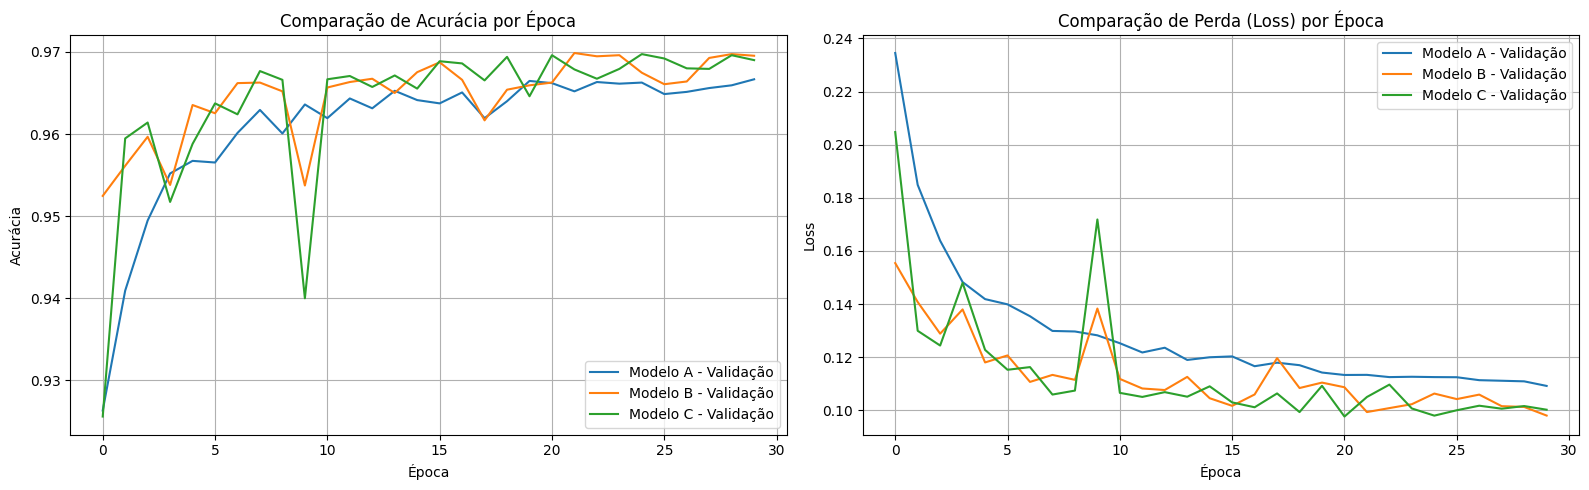

In [19]:
plot_model_comparison(results)


### c.  Treine  o  modelo  testando  diferentes  valores  de  épocas  e  learning  rate, identificando quando se acontece Overfitting ou Underfitting;

Como o objetivo aqui é treinar seguindo diferentes valores de é pocas e leraning rates, eu vou seguir alguns diferentes testes aqui:

Modelos de Testes n - [Descrição] (épocas,LearningRate)
Teste 1 - Modelo que deve dar em UnderFit (10,0.001)
Teste 2 - Pode divergir (30,0.01)
Teste 3 - Pode dar Overfit (50,0.001)
Teste 4 - Underfit com aprendizado bastante lento (30,0.00001)


In [20]:
def train_with_config(model_name, input_dim, lr, epochs):
    model = build_model(model_name, input_dim)
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    return history


In [21]:
configs = [
    ('A', 0.001, 10),
    ('A', 0.01, 30),
    ('A', 0.001, 50),
    ('A', 0.0001, 30),
]

histories_c = {}

for i, (model_name, lr, epochs) in enumerate(configs, start=1):
    print(f"Treinando configuração {i}: LR={lr}, Épocas={epochs}")
    histories_c[f'Teste_{i}'] = train_with_config(model_name, X_train.shape[1], lr, epochs)


Treinando configuração 1: LR=0.001, Épocas=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Treinando configuração 2: LR=0.01, Épocas=30
Treinando configuração 3: LR=0.001, Épocas=50
Treinando configuração 4: LR=0.0001, Épocas=30


In [22]:
def plot_histories(histories):
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    for name, hist in histories.items():
        axs[0].plot(hist.history['val_accuracy'], label=f'{name}')
        axs[1].plot(hist.history['val_loss'], label=f'{name}')

    axs[0].set_title("Acurácia de Validação")
    axs[0].set_xlabel("Época")
    axs[0].set_ylabel("Acurácia")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Loss de Validação")
    axs[1].set_xlabel("Época")
    axs[1].set_ylabel("Loss")
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()


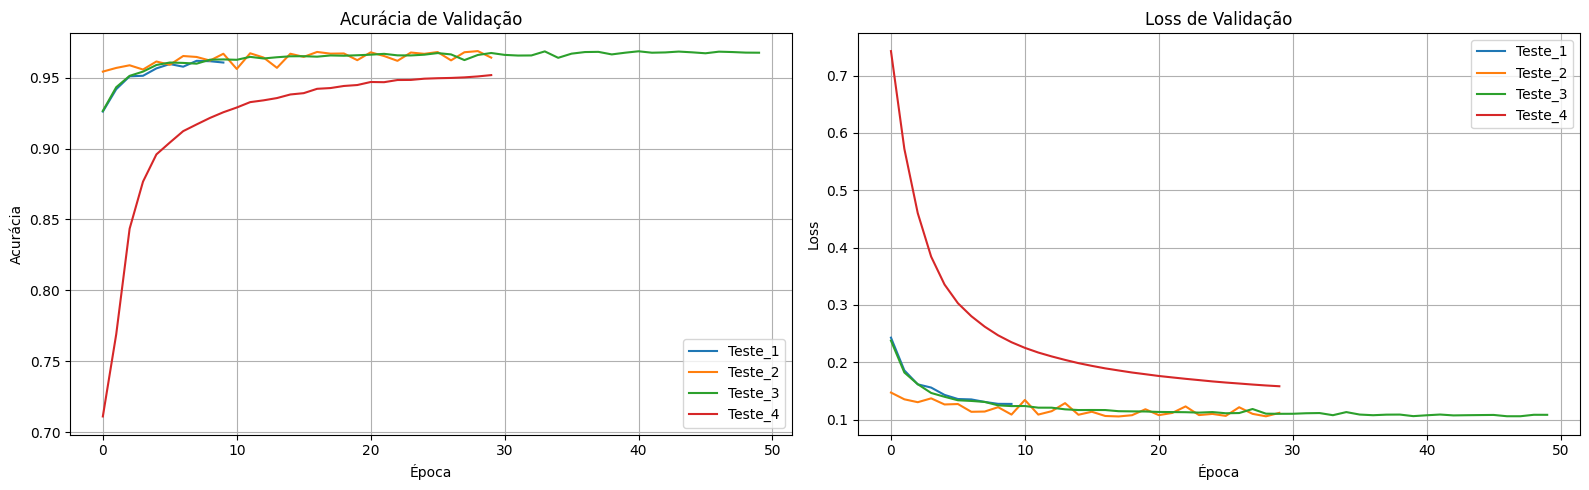

In [23]:
plot_histories(histories_c)

### d.  Testar o efeito da Regularização e outros métodos de otimização;

In [26]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout


def build_model_with_regularization(input_dim):
    return Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])


In [27]:
from tensorflow.keras.optimizers import RMSprop

model = build_model_with_regularization(X_train.shape[1])
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_d = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7988 - loss: 0.5940 - val_accuracy: 0.9357 - val_loss: 0.2474
Epoch 2/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9286 - loss: 0.2673 - val_accuracy: 0.9539 - val_loss: 0.1928
Epoch 3/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9408 - loss: 0.2279 - val_accuracy: 0.9519 - val_loss: 0.1915
Epoch 4/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9446 - loss: 0.2189 - val_accuracy: 0.9583 - val_loss: 0.1792
Epoch 5/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9489 - loss: 0.2060 - val_accuracy: 0.9585 - val_loss: 0.1740
Epoch 6/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9490 - loss: 0.2068 - val_accuracy: 0.9546 - val_loss: 0.1763
Epoch 7/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9498 - loss: 0.2037 - val_accuracy: 0.9578 - val_loss: 0.1761
Epoch 8/30
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9489 - loss: 0.2014 - val_acc

Em seguida, vou construir outro modelo que não utiliza regularização. Assim será possível fazer uma comparação entre os modelos com regularização e sem regularização.

In [28]:
def build_model_baseline(input_dim):
    return Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])


In [29]:
from tensorflow.keras import regularizers

def build_model_regularized(input_dim):
    return Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])


Treinamento dos modelos

In [30]:
def train_and_return_history(model_fn, input_dim, name, optimizer='adam'):
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Otimizador não suportado.")

    model = model_fn(input_dim)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=0
    )

    return history


In [31]:
hist_baseline = train_and_return_history(build_model_baseline, X_train.shape[1], 'Baseline')
hist_regularized = train_and_return_history(build_model_regularized, X_train.shape[1], 'Regularizado')


In [32]:
def plot_comparison(histories, labels):
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    for hist, label in zip(histories, labels):
        axs[0].plot(hist.history['val_accuracy'], label=f'{label}')
        axs[1].plot(hist.history['val_loss'], label=f'{label}')

    axs[0].set_title("Validação - Acurácia")
    axs[0].set_xlabel("Época")
    axs[0].set_ylabel("Acurácia")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Validação - Loss")
    axs[1].set_xlabel("Época")
    axs[1].set_ylabel("Loss")
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()


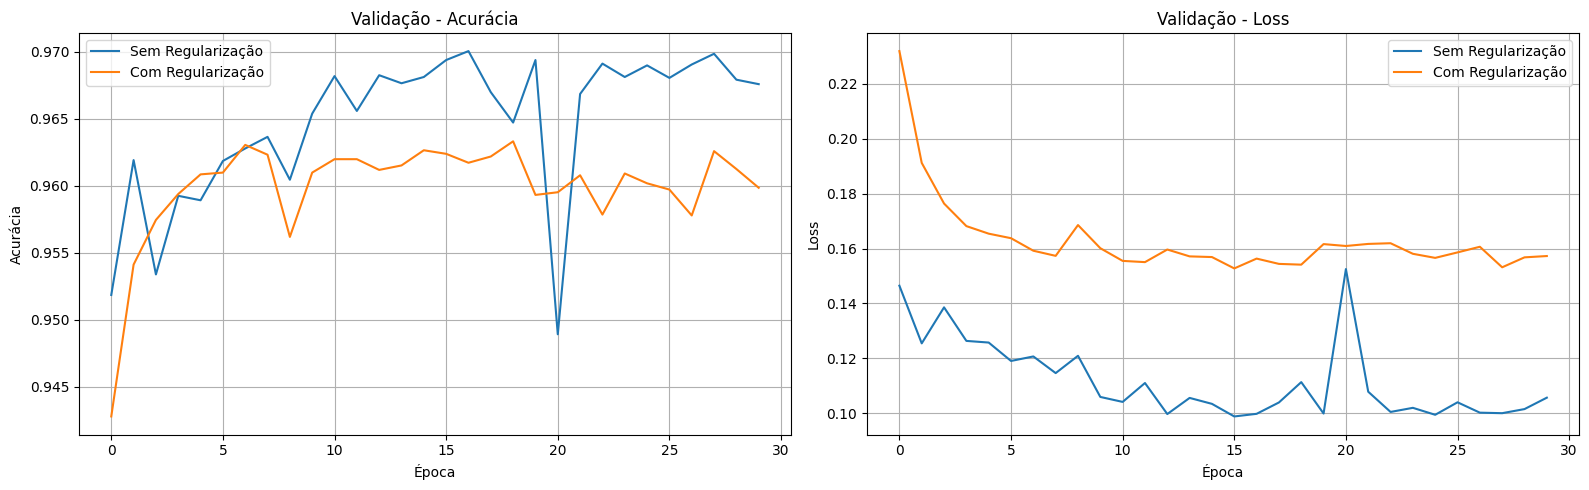

In [33]:
plot_comparison([hist_baseline, hist_regularized], ['Sem Regularização', 'Com Regularização'])
